# Advanced Machine Learning (2019 MOD006566 TRI1 F01CAM)

### Element 010

### Student ID: 0925739

## Component 2: Turnitin ML code submission and Participation in Kaggle Challenge for the Titanic Dataset

First we load the data a cleaned from Component 1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
X_train, y_train = pd.read_csv('X_train.csv'), pd.read_csv('y_train.csv', header=None)
X_valid, y_valid = pd.read_csv('X_valid.csv'), pd.read_csv('y_valid.csv', header=None)

#reshaping y_train andd y_valid into 1-D Numpy array
y_train = np.array(y_train).reshape(534,)
y_valid = np.array(y_valid).reshape(357,)

Below we fit a K-Nearest Neighbor classifier in the data and check the accuracy scores on both the test and valid sets.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_valid, y_valid))

0.8071161048689138
0.6442577030812325


As seen, the K-Nearest Neighbor is not so great at test prediction and hence may not be an excellent algorithm to use in this case.

Moving on, below is a logistic regression fit on the data and accuracy scores on both training and test sets.

In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_valid, y_valid))

0.846441947565543
0.7955182072829131


Logistic regression definitely performs better than KNN and hence could be a good algorithm for this classification task. Improvements can be made on the score by data scaling and adding polynomial features.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV

sc = StandardScaler()
poly = PolynomialFeatures(2)

# Standardizing the datasets
X_train_std = sc.fit_transform(X_train)
X_valid_std = sc.transform(X_valid)

# Transforming to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)


logreg_std = LogisticRegressionCV(Cs=[1,2,4,6,8,10], solver='liblinear', max_iter=200, cv=10, random_state=2)
logreg_std.fit(X_train_std, y_train)

logreg_poly = LogisticRegressionCV(Cs=[0.5], solver='liblinear', penalty='l1', max_iter=300, cv=10, random_state=2)
logreg_poly.fit(X_train_poly, y_train)

print('Logistic Regression with standard scaled data')
print('Train Accuracy :', logreg_std.score(X_train_std, y_train))
print('Test Accuracy  :', logreg_std.score(X_valid_std, y_valid))
# print('Coefficients   :', logreg_std.coef_)

print('===============================================================')
print('Logistic Regression with polynomial features on scaled data')
print('Train Accuracy :', logreg_poly.score(X_train_poly, y_train))
print('Test Accuracy  :', logreg_poly.score(X_valid_poly, y_valid))
# print('Coefficients   :', logreg_poly.coef_)


Logistic Regression with standard scaled data
Train Accuracy : 0.8558052434456929
Test Accuracy  : 0.7927170868347339
Logistic Regression with polynomial features on scaled data
Train Accuracy : 0.8707865168539326
Test Accuracy  : 0.7871148459383753


It is noticed that the logistic regression does not improve much with scaled data or polynomial features.

Below are other classification algorithms.

In [5]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=50.0)
svm.fit(X_train_std, y_train)

print(svm.score(X_train_std, y_train))
print(svm.score(X_valid_std, y_valid))

0.9063670411985019
0.7647058823529411


The Support Vector Machine classifer has slightly less accurate results compared to Logistic Regression.

Below is the code to implement Decision Tree Classifier on the data.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

first_tree = DecisionTreeClassifier(random_state=17)
cr_v = cross_val_score(first_tree, X_train_std, y_train, cv=5)
print('Cross Validation Scores : ', cr_v)

#Performing grid search to find the best parameters for decision tree classifier
L = np.arange(1, 11)
tree_params = {'max_depth': L, 'max_features': [0.5, 0.7, 1]}
tree_grid = GridSearchCV(first_tree,
                         tree_params,
                         cv=5,
                         n_jobs = -1,
                         verbose=True)
tree_grid.fit(X_train_std, y_train)
print('Best accuracy score:', tree_grid.best_score_)
print('Best parameters    :', tree_grid.best_params_)

Cross Validation Scores :  [0.80555556 0.75       0.74528302 0.79245283 0.79245283]
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best accuracy score: 0.8408239700374532
Best parameters    : {'max_depth': 3, 'max_features': 0.7}


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.3s finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The GridSearchCV has helped figure out the best parameters for the decision tree.

We can use the best parameters of the decision tree for our random forest classifer below.

In [7]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, max_depth=3, max_features=0.7, random_state=9)
forest = forest.fit(X_train_std, y_train)

print(forest.score(X_train_std, y_train))
print(forest.score(X_valid_std, y_valid))

0.8576779026217228
0.7955182072829131


The results from the Random Forest Classifier are very similar to Logistic Regression.

It could be that for the amount of features that are currently available, the learning model is only able to generalise to this accuracy level.

In [8]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3, max_features=0.7)

#Creating a AdaBoost instance and fitting at the same time
aboost = AdaBoostClassifier(base_estimator=tree, 
                            n_estimators=500, 
                            learning_rate=0.1, 
                            random_state=1).fit(X_train_std, y_train)

scores = cross_val_score(aboost, X_train_std, y_train, cv=5)
print('AdaBoost Cross validation scores  :', scores)
print('AdaBoost Classifier - Train Score :', aboost.score(X_train_std, y_train))
print('AdaBoost Classifier - Valid Score :', aboost.score(X_valid_std, y_valid))

AdaBoost Cross validation scores  : [0.78703704 0.7962963  0.76415094 0.82075472 0.83018868]
AdaBoost Classifier - Train Score : 0.9925093632958801
AdaBoost Classifier - Valid Score : 0.7478991596638656


Seen above, although the AdaBoost Classifier brought the training accuracy to 99%, the validation set's accuracy does not generalise better than seen from other classifiers.

Below we create a majority voting classifier using VotingClassifier class from scikitLearn and do a GridSearchCV to find the best parameters on our classifiers.

In [9]:
%%time
#This code may take a few minutes for the results as it is doing Grid Search CV in an ensemble of classifiers
from sklearn.ensemble import VotingClassifier
VotC = VotingClassifier(estimators= [('KNN', knn), ('LogReg_Std', logreg_std), ('AdaBoost', aboost), ('RandomForest', forest)],
                        voting='soft',
                        weights=[2,3,2,2],
                        n_jobs=-1,
                        flatten_transform=True)

params = {'KNN__n_neighbors': [3, 5, 7], 'LogReg_Std__Cs': [1,2,4,6,8], 'RandomForest__n_estimators': [20, 200], 'AdaBoost__n_estimators': [20, 200]}
grid = GridSearchCV(estimator=VotC, param_grid=params, cv=5)
grid.fit(X_train_std, y_train)

Wall time: 55.6 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=VotingClassifier(estimators=[('KNN',
                                                     KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=5,
                                                                          p=2,
                                                                          weights='uniform')),
                                                    ('LogReg_Std',
                                                     LogisticRegressionCV(Cs=[1,
                      

The grid classifier takes a while to run but provides us with best parameters to use for all classifiers as shown below.

In [10]:
print('Grid Train Score :', grid.score(X_train_std, y_train))
print('Grid Test Score  :', grid.score(X_valid_std, y_valid))

print('Grid Best Parameters :', grid.best_params_)

Grid Train Score : 0.8801498127340824
Grid Test Score  : 0.803921568627451
Grid Best Parameters : {'AdaBoost__n_estimators': 200, 'KNN__n_neighbors': 3, 'LogReg_Std__Cs': 2, 'RandomForest__n_estimators': 200}


In [11]:
from sklearn.metrics import accuracy_score
y_train_pred = grid.predict(X_train_std)
y_valid_pred = grid.predict(X_valid_std)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_valid, y_valid_pred))

0.8801498127340824
0.803921568627451


In [12]:
Best_VotC = VotingClassifier(estimators= [('KNN', knn), ('LogReg_Std', logreg_std), ('LogReg_Poly', logreg_poly), ('AdaBoost', aboost), ('RandomForest', forest)],
                        voting='soft',
                        weights=[2,3,3,2,2],
                        n_jobs=-1,
                        flatten_transform=True)

params = {'KNN__n_neighbors': [3], 'LogReg_Std__Cs': [1], 'RandomForest__n_estimators': [20], 'AdaBoost__n_estimators': [20]}
grid = GridSearchCV(estimator=VotC, param_grid=params, cv=5)
grid.fit(X_train_std, y_train)

clf_labels = ['knn', 'logreg_std', 'logreg_poly', 'aboost', 'forest','Majority voting']
all_clf = [knn, logreg_std, logreg_poly, aboost, forest, Best_VotC]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train_std, y=y_train, cv=10, scoring='roc_auc')
    print("ROC AUC Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

ROC AUC Accuracy: 0.85 (+/- 0.03) [knn]
ROC AUC Accuracy: 0.89 (+/- 0.03) [logreg_std]
ROC AUC Accuracy: 0.89 (+/- 0.03) [logreg_poly]
ROC AUC Accuracy: 0.86 (+/- 0.02) [aboost]
ROC AUC Accuracy: 0.88 (+/- 0.04) [forest]
ROC AUC Accuracy: 0.89 (+/- 0.03) [Majority voting]


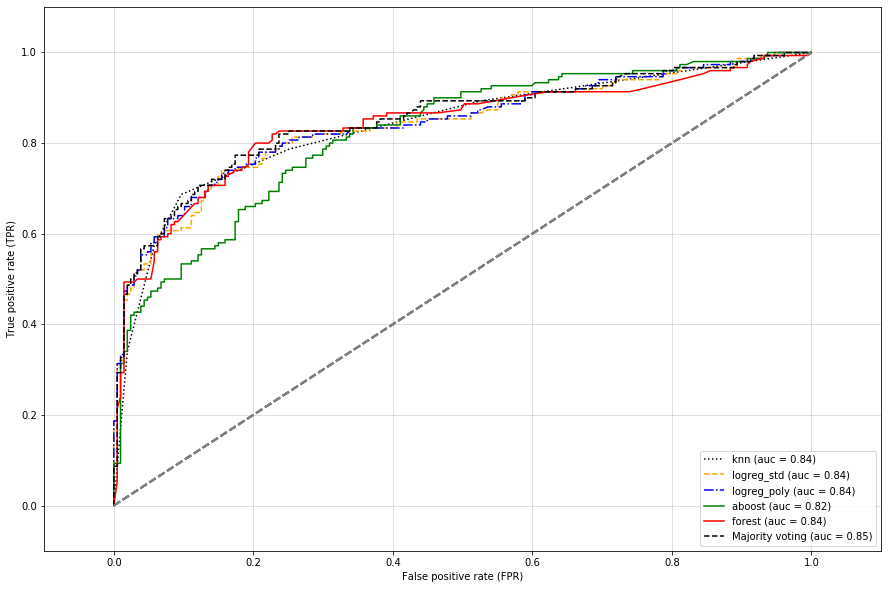

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green', 'red', 'black']
linestyles = [':', '--', '-.', '-', '-', '--']
plt.figure(figsize=(15,10))

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
# assuming the label of the positive class is 1
    y_pred = clf.fit(X_train_std, y_train).predict_proba(X_valid_std)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_valid, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--',color='gray',linewidth=2)
    
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

Now is the best time to make preditions on the test data. We load the test set cleaned from Component 1.

In [14]:
test_set = pd.read_csv('test_set.csv')

In [15]:
test_set_std = sc.transform(test_set)

First lets read 'gender_submission.csv'.

In [16]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


We will make the preditions to go on the **'Survived'** column.

In [17]:
submission['Survived'] = Best_VotC.predict(test_set_std)

In [18]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


After getting the predictions in the correct format, the final predictions are saved as **'submission.csv'**.

In [19]:
submission.to_csv('submission.csv', header = submission.columns.to_list(), index=False)